In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

import warnings
warnings.filterwarnings('ignore')

# Load the dataset
file_path = '/content/drive/MyDrive/LSMS - Research Project/Identify Diseases/Diabetes/Diabetes.csv'
df = pd.read_csv(file_path)

In [3]:
# Display basic information
print(df.head())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [4]:
print(df['gender'].unique())


['Female' 'Male' 'Other']


In [5]:
df['gender'] = df['gender'].replace({"Male": 1, "Female": 0, "Other": 2}).astype(int)


In [6]:
df["smoking_history"].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [7]:
df.replace(["never","No Info","current","former","ever","not current"],[int(0),int(1),int(2),int(3),int(4),int(5)],inplace=True)

In [8]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [9]:
df = df.drop(['hypertension', 'heart_disease'], axis=1)

In [10]:
df['diabetes'] = df['diabetes'].map({0: 'No Diabetes', 1: 'Diabetes'})

In [11]:
# Display basic information
print(df.head())

   gender   age  smoking_history    bmi  HbA1c_level  blood_glucose_level  \
0       0  80.0                0  25.19          6.6                  140   
1       0  54.0                1  27.32          6.6                   80   
2       1  28.0                0  27.32          5.7                  158   
3       0  36.0                2  23.45          5.0                  155   
4       1  76.0                2  20.14          4.8                  155   

      diabetes  
0  No Diabetes  
1  No Diabetes  
2  No Diabetes  
3  No Diabetes  
4  No Diabetes  


In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int64  
 1   age                  100000 non-null  float64
 2   smoking_history      100000 non-null  int64  
 3   bmi                  100000 non-null  float64
 4   HbA1c_level          100000 non-null  float64
 5   blood_glucose_level  100000 non-null  int64  
 6   diabetes             100000 non-null  object 
dtypes: float64(3), int64(3), object(1)
memory usage: 5.3+ MB
None


In [13]:
print(df.shape)

(100000, 7)


In [14]:
df.isnull().sum()

,0
gender,0
age,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [15]:
df.columns

Index(['gender', 'age', 'smoking_history', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

In [16]:
df["diabetes"].unique()

array(['No Diabetes', 'Diabetes'], dtype=object)

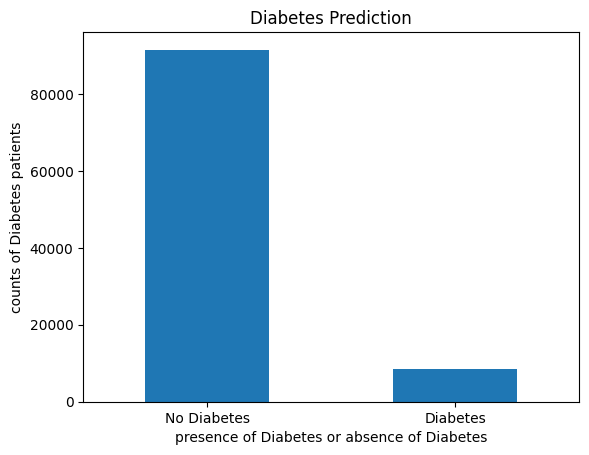

In [17]:
df["diabetes"].value_counts().plot.bar()
plt.title("Diabetes Prediction")
plt.xlabel("presence of Diabetes or absence of Diabetes")
plt.ylabel("counts of Diabetes patients")
plt.xticks(rotation=0)
plt.show()

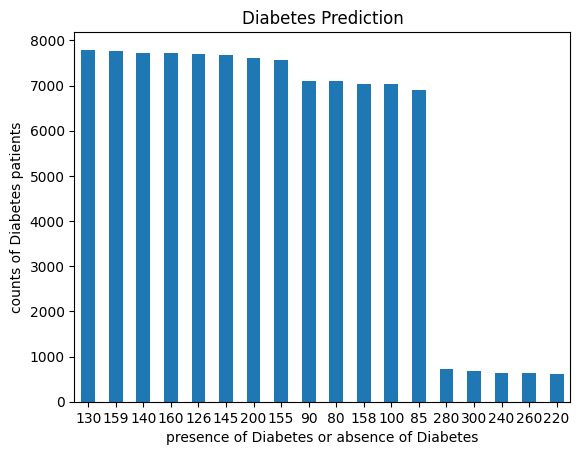

In [18]:
df["blood_glucose_level"].value_counts().plot.bar()
plt.title("Diabetes Prediction")
plt.xlabel("presence of Diabetes or absence of Diabetes")
plt.ylabel("counts of Diabetes patients")
plt.xticks(rotation=0)
plt.show()

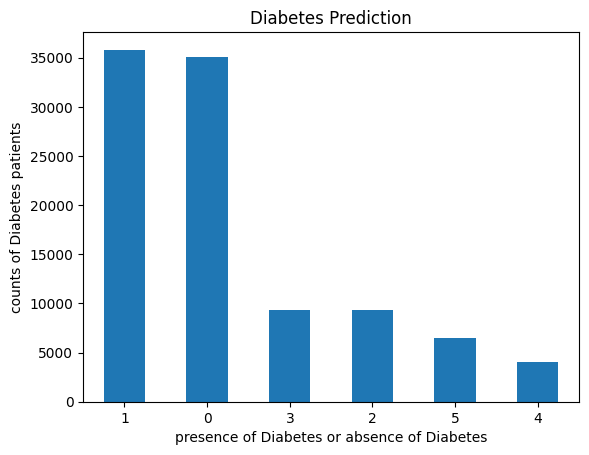

In [19]:
df["smoking_history"].value_counts().plot.bar()
plt.title("Diabetes Prediction")
plt.xlabel("presence of Diabetes or absence of Diabetes")
plt.ylabel("counts of Diabetes patients")
plt.xticks(rotation=0)
plt.show()

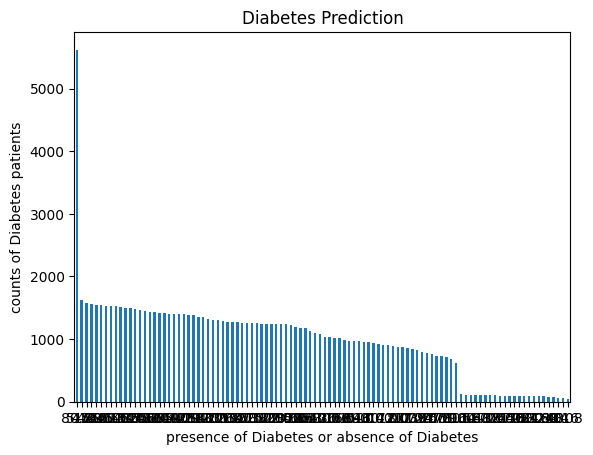

In [20]:
df["age"].value_counts().plot.bar()
plt.title("Diabetes Prediction")
plt.xlabel("presence of Diabetes or absence of Diabetes")
plt.ylabel("counts of Diabetes patients")
plt.xticks(rotation=0)
plt.show()

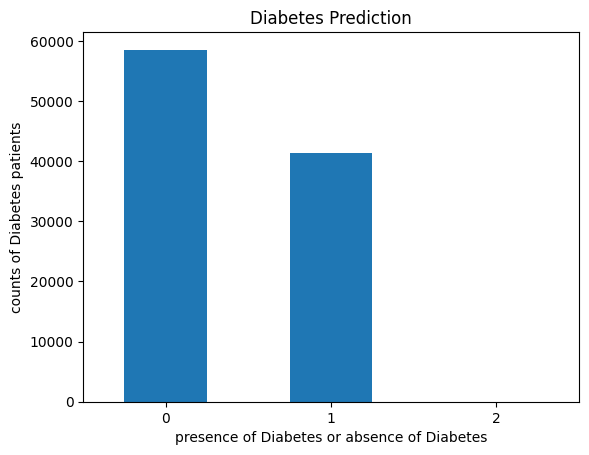

In [21]:
df["gender"].value_counts().plot.bar()
plt.title("Diabetes Prediction")
plt.xlabel("presence of Diabetes or absence of Diabetes")
plt.ylabel("counts of Diabetes patients")
plt.xticks(rotation=0)
plt.show()

In [22]:
X=df[["gender", "age", "smoking_history", "bmi" ,"HbA1c_level","blood_glucose_level"]]

In [23]:
X.head()

,gender,age,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,25.19,6.6,140
1,0,54.0,1,27.32,6.6,80
2,1,28.0,0,27.32,5.7,158
3,0,36.0,2,23.45,5.0,155
4,1,76.0,2,20.14,4.8,155


In [24]:
Y=df[["diabetes"]]

In [25]:
Y.head()

,diabetes
0,No Diabetes
1,No Diabetes
2,No Diabetes
3,No Diabetes
4,No Diabetes


In [26]:
# Prepare dataset for training
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.40,random_state=25)

In [27]:
x_train.shape

(60000, 6)

In [28]:
y_train.shape

(60000, 1)

In [29]:
x_test.shape

(40000, 6)

In [30]:
y_test.shape

(40000, 1)

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_features='sqrt', n_estimators=200)
rf.fit(x_train, y_train)
rf_score = rf.score(x_test, y_test) * 100
print(f"Random Forest Classifier Accuracy : {rf_score:.2f}%")

Random Forest Classifier Accuracy : 96.97%


In [32]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(random_state=0,max_iter=3000)
lr.fit(x_train, y_train)
lr_score=lr.score(x_test,y_test)*100
print(f"LogisticRegression Accuracy : {lr_score:.2f}%")

LogisticRegression Accuracy : 95.99%


In [33]:
from sklearn.svm import SVC

svc = SVC()  # Initialize SVC
svc.fit(x_train, y_train)  # Train the model
svc_score = svc.score(x_test, y_test) * 100  # Calculate accuracy
print(f"SVC Accuracy: {svc_score:.2f}%")

SVC Accuracy: 94.84%


In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()  # Initialize KNN
knn.fit(x_train, y_train)  # Train the model
knn_score = knn.score(x_test, y_test) * 100  # Calculate accuracy
print(f"KNN Accuracy: {knn_score:.2f}%")

KNN Accuracy: 95.19%


In [35]:
from sklearn.tree import DecisionTreeClassifier

dc=DecisionTreeClassifier()
dc.fit(x_train, y_train)
dc_score=dc.score(x_test,y_test)*100
print(f"Decision Tree Classifier Accuracy: {dc_score:.2f}%")

Decision Tree Classifier Accuracy: 94.89%


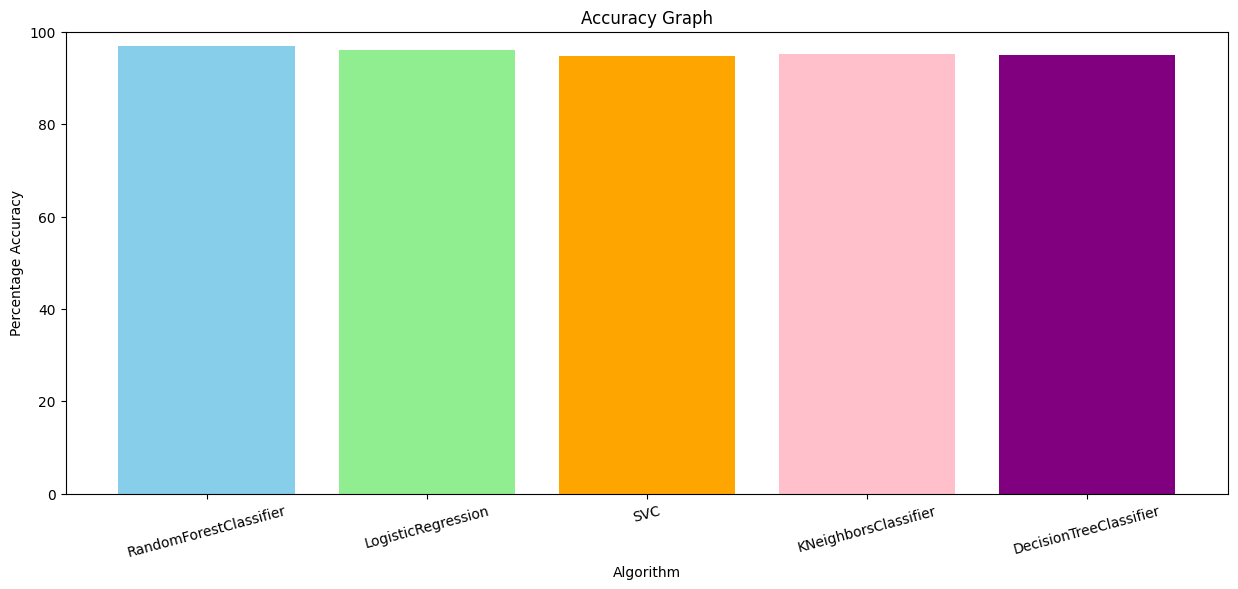

In [36]:
a = ["RandomForestClassifier", "LogisticRegression", "SVC", "KNeighborsClassifier", "DecisionTreeClassifier"]
b = [rf_score, lr_score, svc_score, knn_score, dc_score]

# Define a list of colors
colors = ['skyblue', 'lightgreen', 'orange', 'pink', 'purple']

plt.figure(figsize=(15, 6))
plt.bar(a, b, color=colors)  # Pass the color list
plt.title("Accuracy Graph")
plt.xlabel("Algorithm")
plt.ylabel("Percentage Accuracy")
plt.ylim(0, 100)  # Ensure y-axis limits show percentages properly
plt.xticks(rotation=15)
plt.show()


In [37]:
# Find the best model based on accuracy
scores = [rf_score, lr_score, svc_score, knn_score, dc_score]
models = ["RandomForestClassifier", "LogisticRegression", "SVC", "KNeighborsClassifier", "DecisionTreeClassifier"]

# Identify the best model
best_model_name = models[scores.index(max(scores))]
print(f"Best model based on accuracy: {best_model_name}")


Best model based on accuracy: RandomForestClassifier


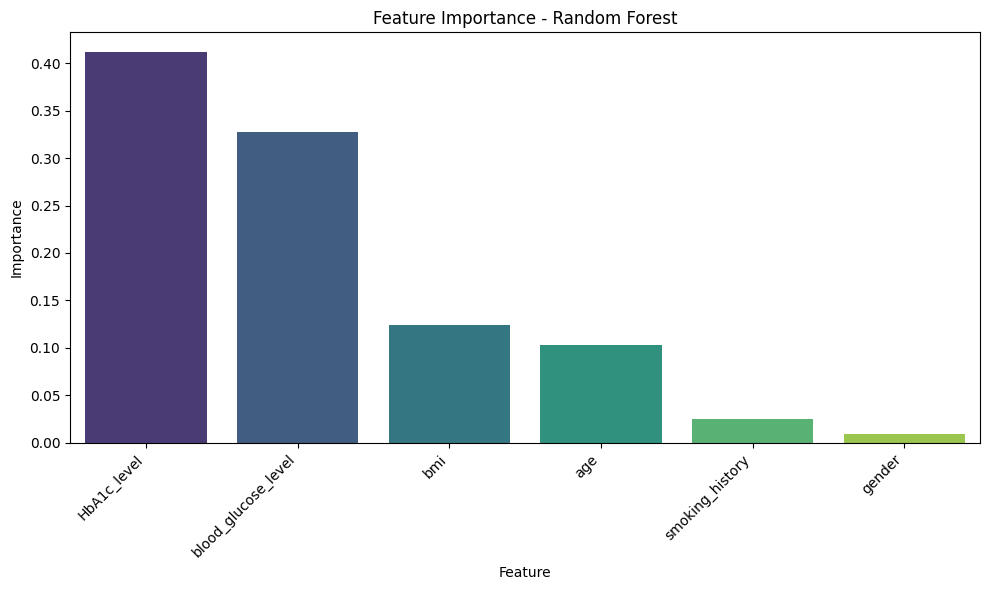

In [38]:
# Ensure feature_importance and feature names are aligned
feature_importance = rf.feature_importances_
feature_names = X.columns if isinstance(X, pd.DataFrame) else [f"Feature {i}" for i in range(X.shape[1])]

# Create a DataFrame for better plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Feature', y='Importance', palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [39]:
# Save the best model to a file
joblib.dump(best_model_name, 'best_diabetes_model.joblib')
print("Best model saved as 'best_diabetes_model.joblib'.")

Best model saved as 'best_diabetes_model.joblib'.


In [40]:
result=rf.predict([[6.5,200,19.31,44,0,0]])

In [41]:
result

array(['No Diabetes'], dtype=object)

In [42]:
result_percentage=rf.predict_proba([[6.5,200,19.31,44,0,0]])

In [43]:
result_percentage*100

array([[ 0.5, 99.5]])

In [44]:
max(result_percentage[0])

0.995

In [45]:
max(result_percentage[0])*100

99.5

In [46]:
round(max(result_percentage[0])*100,2)

99.5

In [47]:
print(round(max(result_percentage[0])*100,2),"presence of",result[0])

99.5 presence of No Diabetes


In [48]:
# Predict diabetes based on user inputs
gender = float(input("Enter gender (Male=1, Female=0, Other=2): "))
age = float(input("Enter age: "))
smoking_history = float(input("Enter smoking history (0=never, 1=No Info, 2=current, 3=former, 4=ever, 5=not current): "))
bmi = float(input("Enter BMI: "))
hba1c_level = float(input("Enter HbA1c level: "))
blood_glucose_level = float(input("Enter blood glucose level: "))

# Create input array
input_features = [[gender, age, smoking_history, bmi, hba1c_level, blood_glucose_level]]

# Make predictions
result = rf.predict(input_features)
result_percentage = rf.predict_proba(input_features)

# Display results
confidence = round(max(result_percentage[0]) * 100, 2)
print(f"{confidence}% it is {result[0]}")

Enter gender (Male=1, Female=0, Other=2): 0
Enter age: 26
Enter smoking history (0=never, 1=No Info, 2=current, 3=former, 4=ever, 5=not current): 4
Enter BMI: 65
Enter HbA1c level: 57
Enter blood glucose level: 78
84.0% it is Diabetes
